In [287]:
import pandas as pd
%matplotlib inline 

In [288]:
data = pd.read_csv('C:/Users/salga/OneDrive/Desktop/data/pl_dataset.csv') #change this to your directory
data_MW = data[data.MW > 3]

data_MW.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)

data_MW

C:\Users\salga\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
30,H,1.250000,1.000000,D,D,W,D,W,L,0.500000,0.250000,0.250000,-16.0
31,NH,0.750000,0.250000,L,L,W,D,L,L,-0.500000,-0.750000,0.500000,-2.0
32,H,1.000000,1.000000,L,D,W,D,W,L,0.000000,0.250000,0.000000,-3.0
33,NH,0.750000,0.500000,L,L,W,D,L,D,-0.250000,-0.250000,0.250000,3.0
34,NH,1.000000,1.500000,D,L,W,W,W,L,0.000000,0.750000,-0.500000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,NH,1.631579,1.657895,L,W,L,D,W,D,0.736842,0.736842,-0.105263,3.0
7596,H,2.052632,0.552632,W,W,W,L,L,L,1.631579,-1.157895,0.315789,-17.0
7597,NH,1.157895,2.526316,D,L,L,W,L,D,-0.473684,1.315789,-0.210526,11.0
7598,H,1.289474,1.421053,W,D,D,L,L,W,-0.289474,0.052632,0.052632,-2.0


In [289]:
no_of_matches = len(data.index)
no_of_homewins = len(data[data.FTR == 'H'])
no_of_homewins_withGD = len(data[(data.FTR == 'H') & (data.HTGD > 0)])
win_pct = (no_of_homewins/no_of_matches) * 100
win_pct_GD = (no_of_homewins_withGD/no_of_matches) * 100

print ("Number of matches: "+ str(no_of_matches))
print ("Number of home victories: "+ str(no_of_homewins))
print ("Number of home victories with positive GD: "+ str(no_of_homewins_withGD))
print ("Win Percentage: "+ str(round(win_pct,2))+"%")
print ("Win Percentage with positive GD: "+ str(round(win_pct_GD,2))+"%")

Number of matches: 7600
Number of home victories: 3529
Number of home victories with positive GD: 1816
Win Percentage: 46.43%
Win Percentage with positive GD: 23.89%


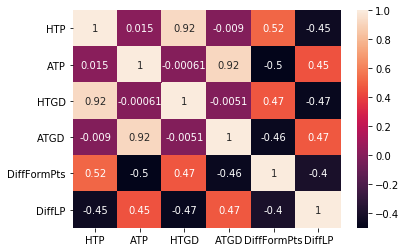

In [290]:
import seaborn as sns
sns.heatmap(data_MW.corr(), annot=True)

In [291]:
from sklearn.preprocessing import scale
x_features = data_MW.drop(['FTR'],1) #remove FTR, where the ,1 indicates a column
y_target = data_MW['FTR'] #creates a variable with one column with all the full time results
columns = [['HTP','ATP','HTGD','ATGD', 'DiffFormPts','DiffLP']]
for column in columns:
    x_features[column] = scale(x_features[column])

In [292]:
plDF = pd.DataFrame(index = x_features.index)
for column, column_data in x_features.iteritems():
    
    if column_data.dtype == object:
            column_data = pd.get_dummies(column_data, prefix = column)
            
    plDF = plDF.join(column_data)

x_features = plDF
print ("Number of features: "+str(len(x_features.columns)))
print (list(plDF.columns))

Number of features: 24
['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']


In [293]:
x_features

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
30,-0.046305,-0.597459,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0.720545,0.339394,0.722075,-1.989112
31,-1.089006,-2.170778,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,-0.701305,-1.085232,1.408757,-0.248297
32,-0.567655,-0.597459,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0.009620,0.339394,0.035394,-0.372641
33,-1.089006,-1.646338,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,-0.345843,-0.372919,0.722075,0.373423
34,-0.567655,0.451421,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0.009620,1.051708,-1.337969,0.373423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,0.749442,0.782646,0,1,0,0,0,1,0,1,...,0,0,1,1,0,0,1.057299,1.032963,-0.253735,0.373423
7596,1.627506,-1.535930,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,2.329481,-1.666330,0.902781,-2.113456
7597,-0.238381,2.604384,1,0,0,0,1,0,0,1,...,0,1,0,1,0,0,-0.663888,1.857747,-0.542864,1.368174
7598,0.036014,0.285808,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,-0.401968,0.058218,0.179958,-0.248297


In [294]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 700, stratify = y_target)

In [295]:
from sklearn.metrics import f1_score
    
    
def label_predict(model, features, target):
   # Makes predictions using Logistic Regression based on accuracy metrics and the F1 score.
    y_prediction = model.predict(features)

    return f1_score(target, y_prediction, pos_label='H'), sum(target == y_prediction) / float(len(y_prediction))

def train_predictions(model, x_train, y_train, x_test, y_test):
    # Train the Logistic Regression model
    model.fit(x_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = label_predict(model, x_train, y_train)
    print ("The F1 score for the training dataset was "+str(f1))
    print ("The accuracy score for the training dataset was "+str(acc))
    
    f1, acc = label_predict(model, x_test, y_test)
    print ("The F1 score for the testing dataset was "+str(f1))
    print ("The accuracy score for the testing dataset was "+str(acc))

In [296]:
from sklearn.linear_model import LogisticRegression 
LR = LogisticRegression(random_state = 4)

train_predictions(LR, x_train, y_train, x_test, y_test)


The F1 score for the training dataset was 0.6202690582959641
The accuracy score for the training dataset was 0.663968253968254
The F1 score for the testing dataset was 0.6443381180223285
The accuracy score for the testing dataset was 0.6814285714285714
